In [2]:
import captum
import torch
import torchvision
from clip import load

model, transform = load("RN50", jit=False)

In [3]:
import captum.optim as optimviz

In [3]:
print(model)

CLIP(
  (visual): ModifiedResNet(
    (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (avgpool): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (relu): ReLU(inplace=True)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn

  0%|          | 0/1025 [00:00<?, ? step/s]

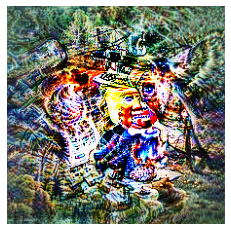

In [10]:
def vis_neuron_large(
    model: torch.nn.Module, target: torch.nn.Module, channel: int
) -> None:
    image = optimviz.images.NaturalImage((224, 224)).to("cuda")
    transforms = torch.nn.Sequential(
        torch.nn.ReflectionPad2d(16),
        optimviz.transform.RandomSpatialJitter(16),
        optimviz.transform.RandomScale(scale=(1, 0.975, 1.025, 0.95, 1.05)),
        torchvision.transforms.RandomRotation(degrees=(-5, 5)),
        optimviz.transform.RandomSpatialJitter(8),
        optimviz.transform.CenterCrop((224, 224)),
    )
    loss_fn = optimviz.loss.NeuronActivation(target, channel)
    obj = optimviz.InputOptimization(model, image, transforms, [target], loss_fn)
    history = obj.optimize(optimviz.objectives.n_steps(1025))
    image().show()

vis_neuron_large(model.visual, model.visual.layer4[2].conv3, 1052)


In [14]:
optimviz.circuits.extract_expanded_weights(model.visual, model.visual.layer4[0].conv3, model.visual.layer3[5].conv3, 3)

RuntimeError: Expected object of device type cuda but got device type cpu for argument #1 'self' in call to _thnn_conv2d_forward